In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
my_weight = pd.read_csv('Jordan Иванов - Export Data 6-2-2019 _ 8-2-2021.csv')
my_weight

,Time,Weight,BMI,Body Fat,Fat-Free Body Weight,Subcutaneous Fat,Visceral Fat,Body Water,Muscle Mass,Skeletal Muscles,Bone Mass,Protein,BMR,Metabolic Age
0,8/2/2021 07:09,98.15 kg,27.2,--,--,--,--,--,--,--,--,--,--,--
1,7/26/2021 07:40,97.50 kg,27.0,--,--,--,--,--,--,--,--,--,--,--
2,7/9/2021 09:54,95.05 kg,26.3,--,--,--,--,--,--,--,--,--,--,--
3,7/4/2021 09:27,92.45 kg,25.6,--,--,--,--,--,--,--,--,--,--,--
4,5/3/2021 11:49,91.15 kg,25.2,--,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,6/7/2019 06:59,92.20 kg,25.5,19.9 %,73.90 kg,17.3 %,8,57.9 %,70.20 kg,51.8 %,3.70 kg,18.2 %,1965 Kcal,39
138,6/7/2019 06:59,92.20 kg,25.5,19.9 %,73.90 kg,17.3 %,8,57.9 %,70.20 kg,51.8 %,3.70 kg,18.2 %,1965 Kcal,39
139,6/6/2019 23:19,93.80 kg,26.0,20.5 %,74.60 kg,17.8 %,8,57.4 %,70.80 kg,51.4 %,3.70 kg,18.1 %,1980 Kcal,39
140,6/6/2019 21:00,94.45 kg,26.2,20.7 %,74.90 kg,18.0 %,9,57.3 %,71.20 kg,51.2 %,3.70 kg,18.1 %,1987 Kcal,40


In [3]:
my_weight = my_weight.loc[:, ['Time', 'Weight', 'BMI']]

In [4]:
my_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    142 non-null    object 
 1   Weight  142 non-null    object 
 2   BMI     142 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


In [5]:
my_weight['time'] = pd.to_datetime(my_weight.Time)

In [6]:
my_weight['weight'] = my_weight.Weight.str.slice(0, 5).astype(float)

In [7]:
my_weight['bmi'] = my_weight.BMI

In [8]:
my = my_weight.loc[:, ['time', 'weight', 'bmi']]
my_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    142 non-null    object        
 1   Weight  142 non-null    object        
 2   BMI     142 non-null    float64       
 3   time    142 non-null    datetime64[ns]
 4   weight  142 non-null    float64       
 5   bmi     142 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 6.8+ KB


In [9]:
my.to_excel('my_weight.xlsx', index=False)

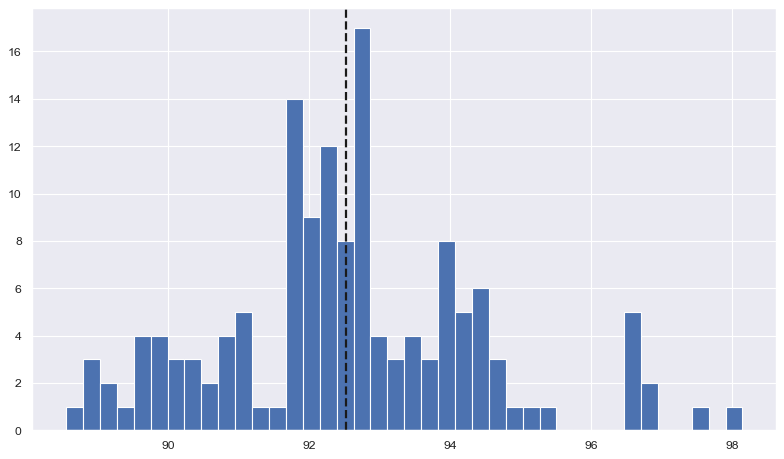

In [15]:
sns.set()
mean=np.mean(my.weight)
fig, ax = plt.subplots(figsize=(12, 7), dpi=80)
plt.hist(my.weight, bins=40)
plt.axvline(mean, color="k", linestyle="dashed", linewidth=2)

plt.show()

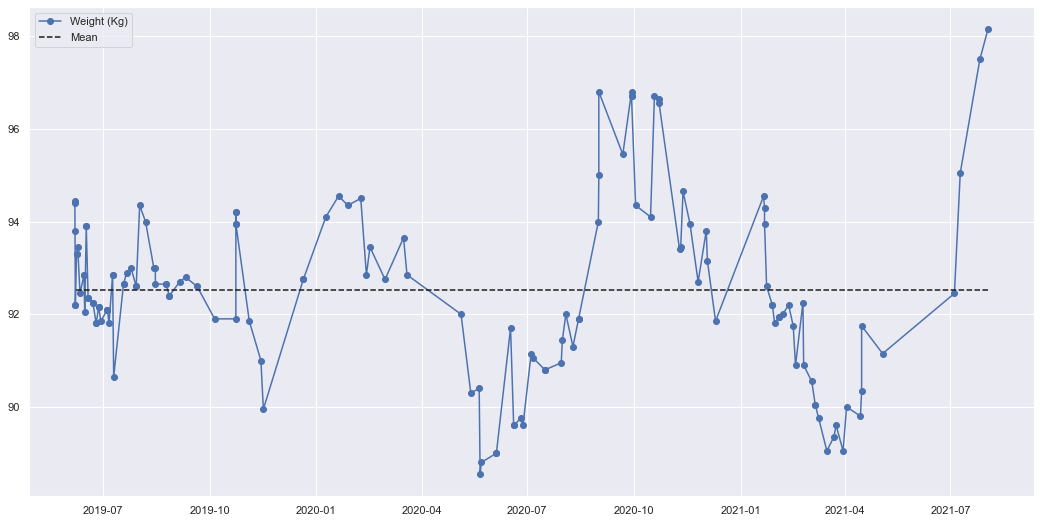

In [11]:
mean = [np.mean(my.weight)]*len(my.time)
fig, ax = plt.subplots(figsize=(18, 9))
plt.plot(my.time, my.weight,  label='Weight (Kg)', marker='o')
plt.plot(my.time, mean, label='Mean', linestyle='--', color='k')
legend = ax.legend(loc='upper left')

plt.show()

In [12]:
def plot_distribution(inp):
    sns.set()
    plt.figure(figsize=(14, 9))
    ax = sns.kdeplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=2)
    _, max_ = plt.ylim()
    plt.text(inp.mean() + inp.mean() / 100, max_ - max_ / 40, "Mean: {:.3f}".format(inp.mean()))
    return plt.show()

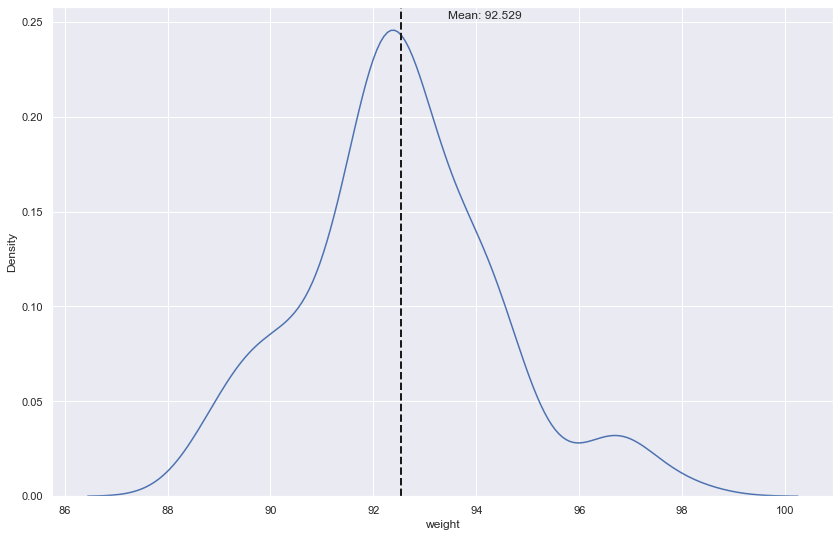

In [13]:
plot_distribution(my.weight)

In [22]:
my.weight.value_counts()

92.85    6
92.65    5
92.20    5
91.80    4
89.60    4
        ..
95.05    1
96.65    1
90.65    1
94.40    1
93.40    1
Name: weight, Length: 74, dtype: int64